In [1]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv('delivery_time.csv')
df.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
# Data description
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
# EDA and visualization

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

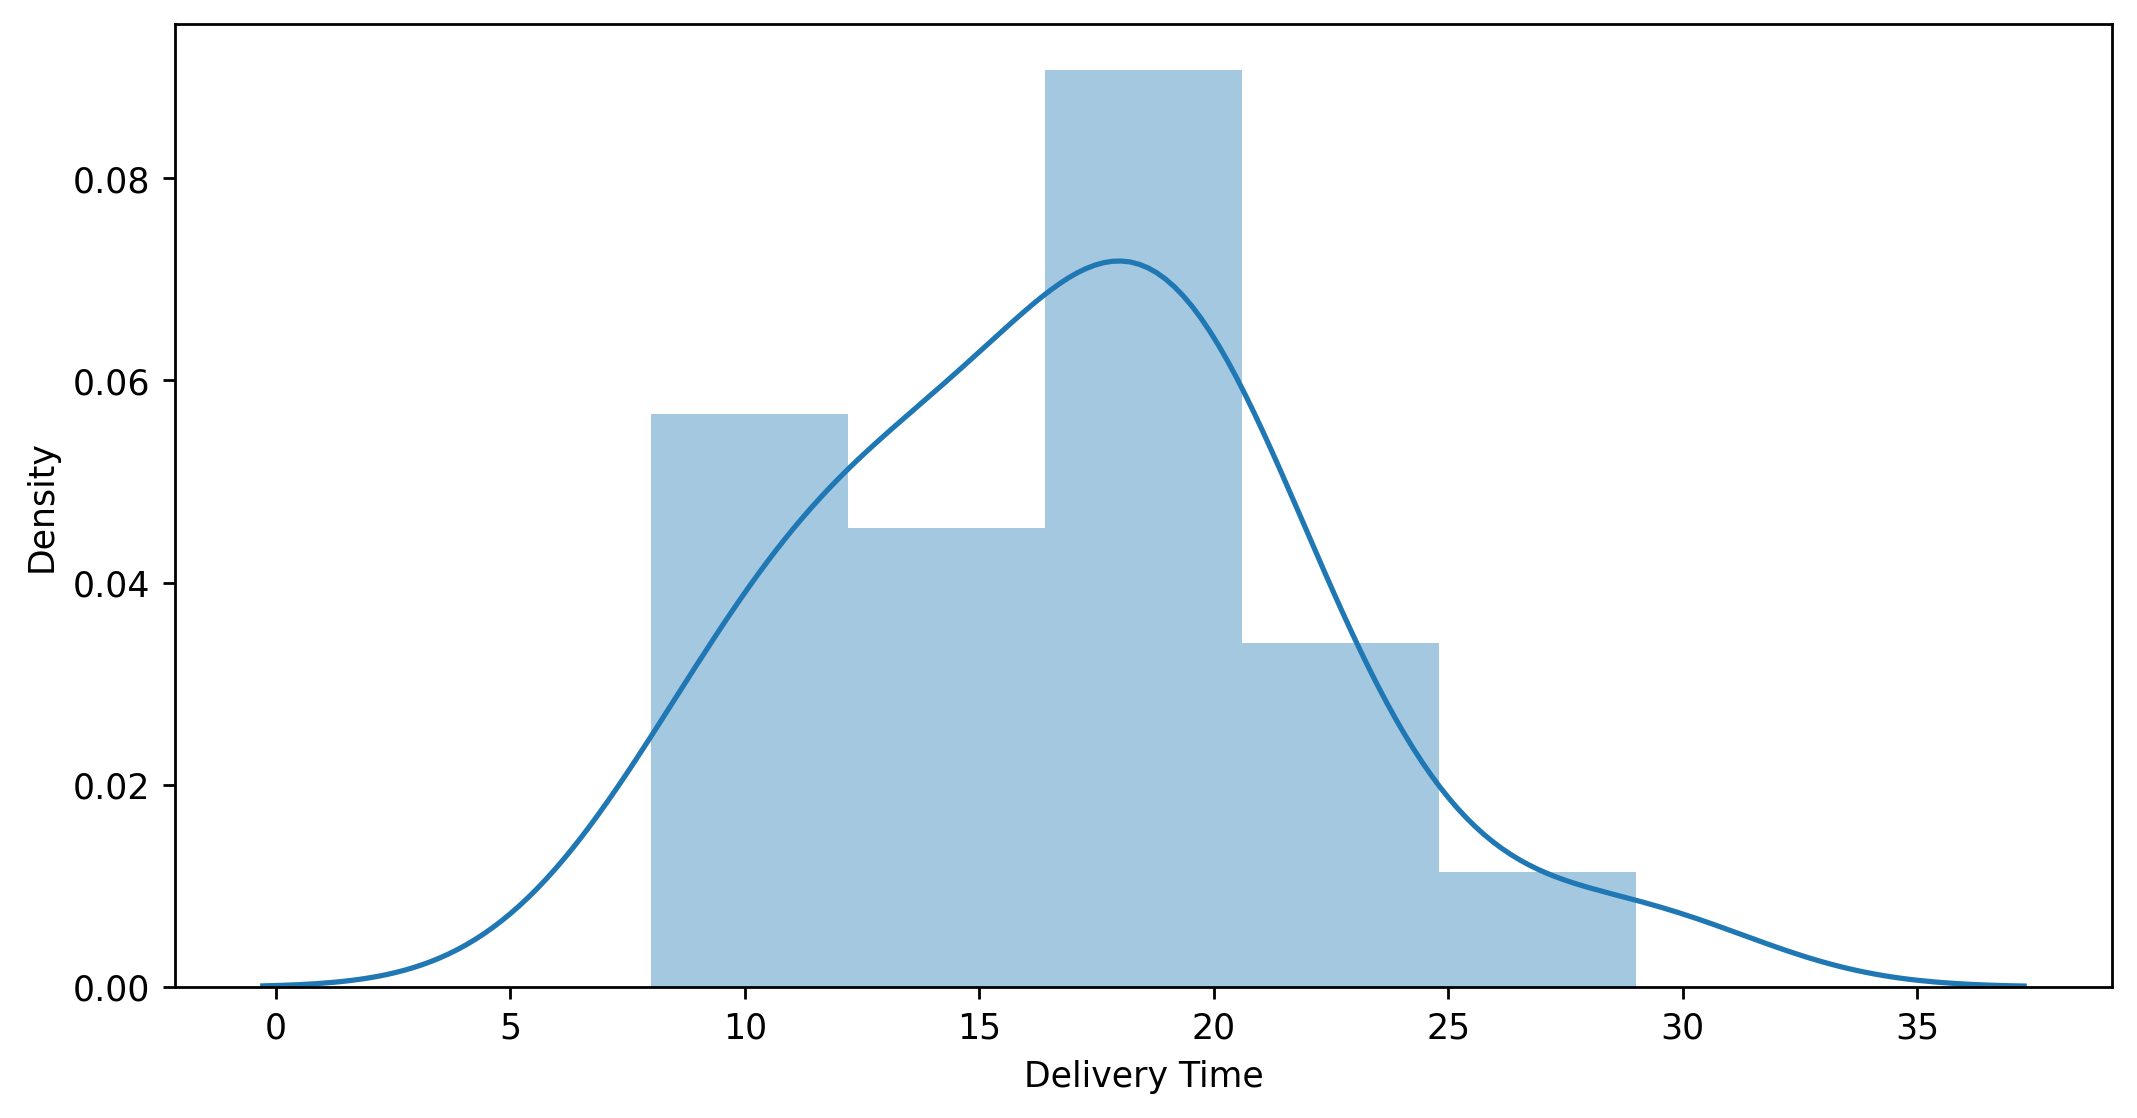

In [6]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

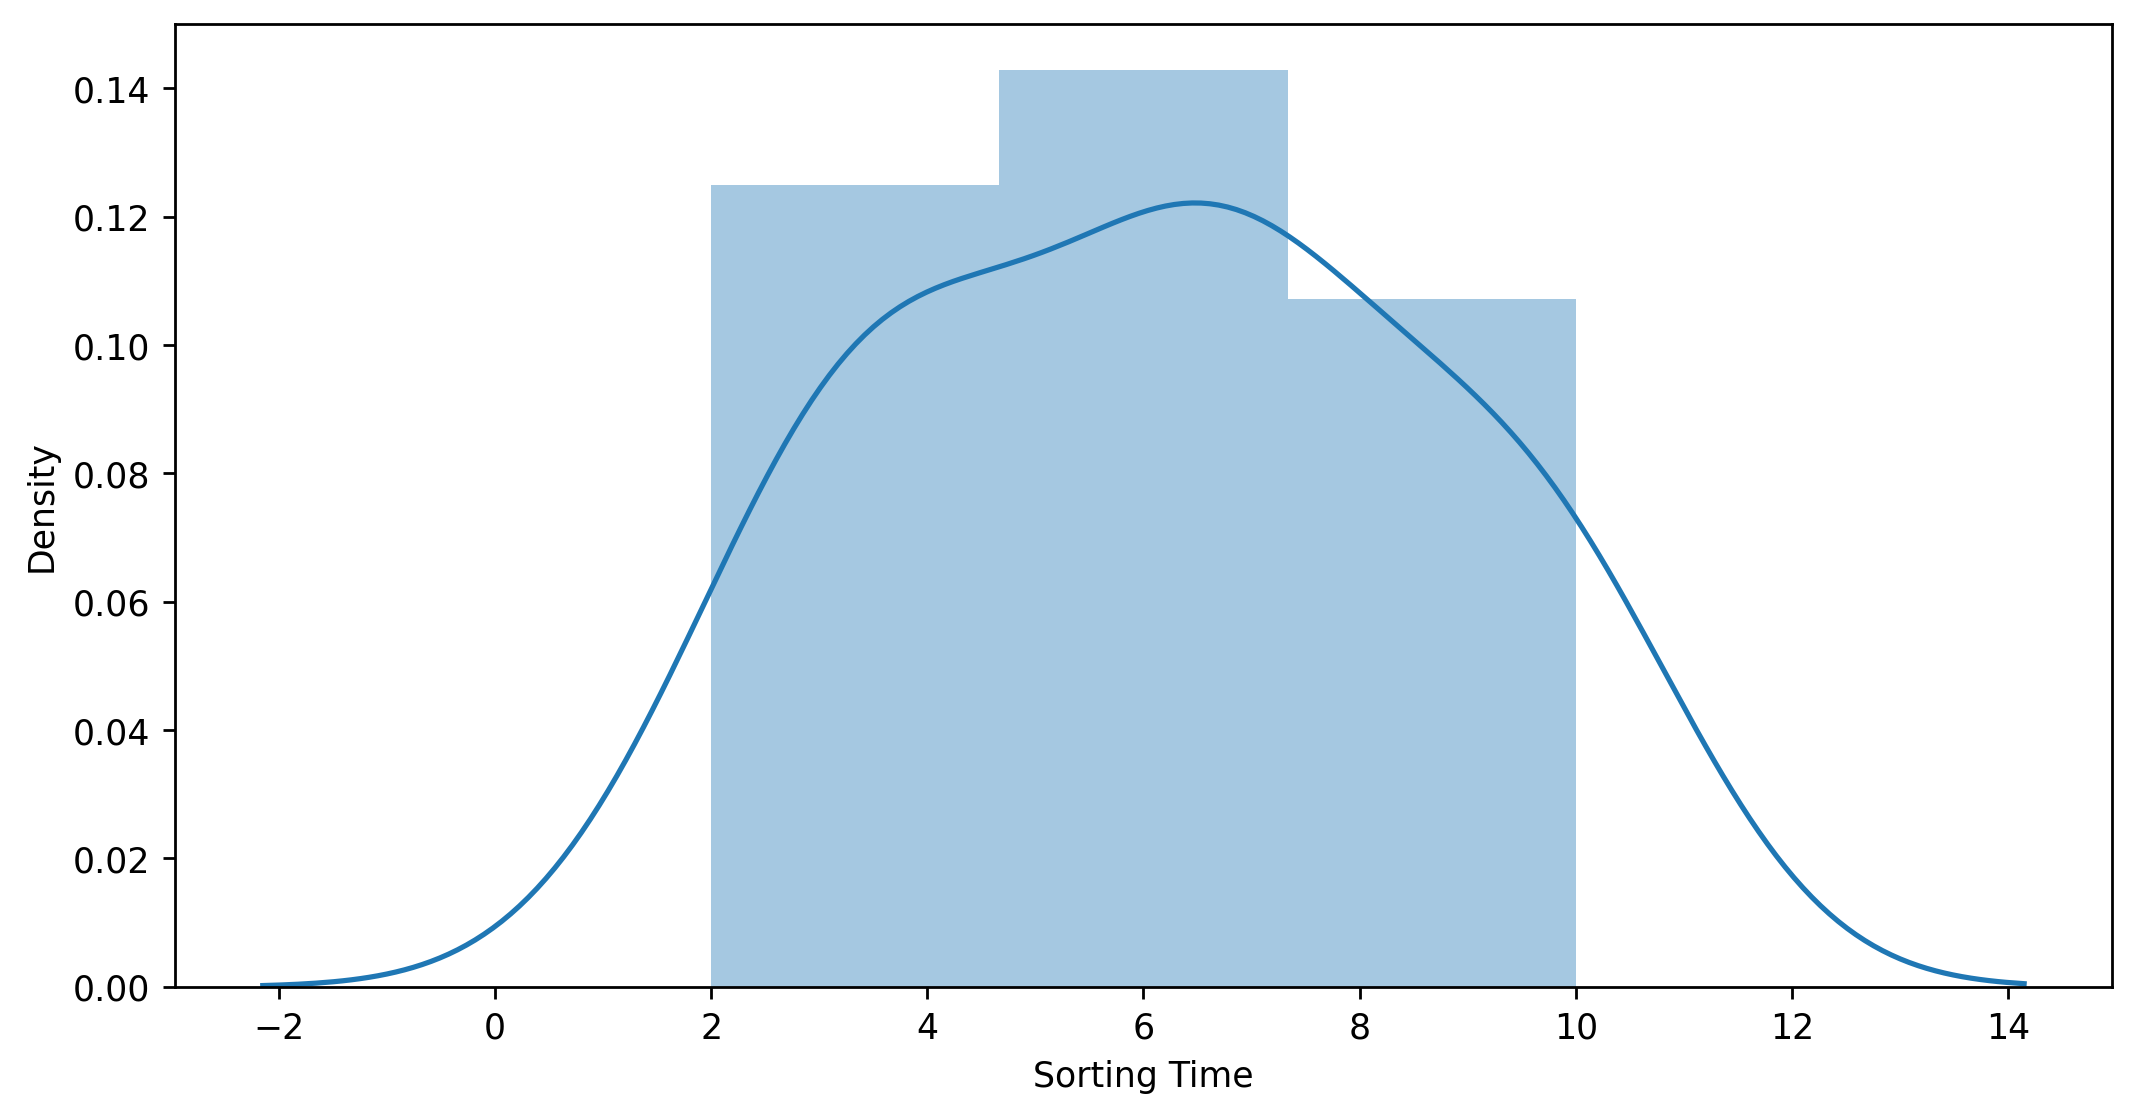

In [7]:
sns.distplot(df['Sorting Time'])

In [8]:
# Feature Engineering

In [15]:
df = df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'}, axis = 1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
# Correlation analysis

In [11]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


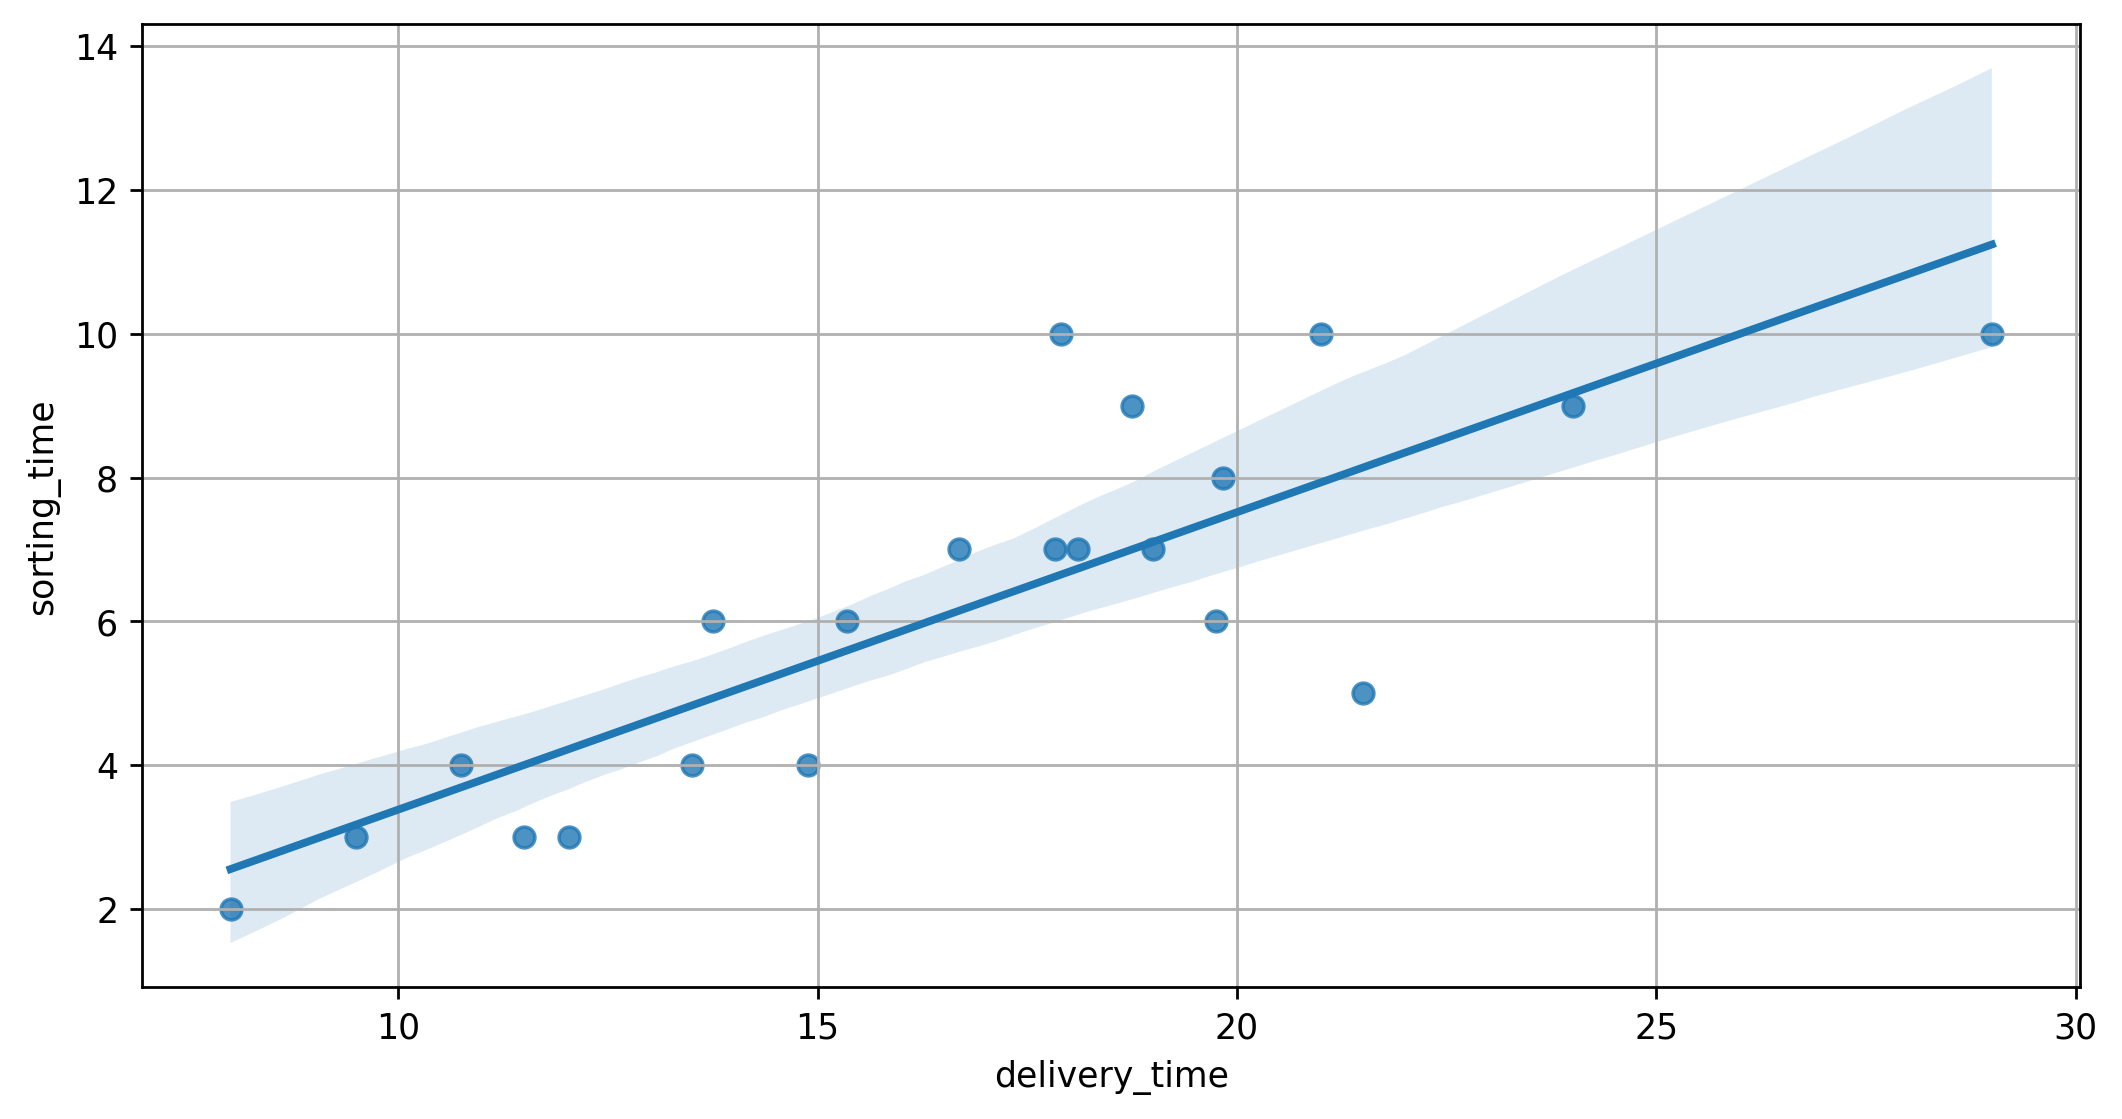

In [17]:
sns.regplot(x = df['delivery_time'], y = df['sorting_time'])
plt.grid()

In [18]:
# Model building 

import statsmodels.formula.api as smf

In [21]:
model = smf.ols('delivery_time ~ sorting_time', data = df).fit()

In [22]:
# Model testing

In [23]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [24]:
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [25]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [26]:
# Model prediction

In [27]:
delivery_time = (6.582734) + (1.649020)* (5)  # Manual prediction for say sorting time 5
delivery_time

14.827834

In [28]:
new_data = pd.Series([5,8])   # Automatic Prediction for say sorting time 5, 8
new_data

0    5
1    8
dtype: int64

In [29]:
data_pred = pd.DataFrame(new_data, columns = ['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [31]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64